In [1]:
import pandas as pd
# load in deals merged data 
def load_csv_from_github(file_name):
 base_url = "https://raw.githubusercontent.com/marymorkos/SalesPlaybookDS5640/refs/heads/main/"
 return pd.read_csv(base_url + file_name)

df = load_csv_from_github("anonymized_hubspot_companies.csv")

/var/folders/12/46qydqg93fb95fh7m05jlh540000gn/T/ipykernel_2844/2277556800.py:5: DtypeWarning: Columns (24,25,28,32,45) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(base_url + file_name)


In [2]:
# Calculate the percentage of missing values in each column
missing_percentage = df.isna().mean()

# Filter columns that have less than 50% missing values
columns_to_keep = missing_percentage[missing_percentage < 0.5].index.tolist()

# Create a new DataFrame with only these columns
df_cleaned = df[columns_to_keep]

# Print information about the changes
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")
print(f"Removed {df.shape[1] - df_cleaned.shape[1]} columns with 50% or more missing values")

Original DataFrame shape: (19851, 46)
Cleaned DataFrame shape: (19851, 20)
Removed 26 columns with 50% or more missing values


In [3]:
df_cleaned.columns.tolist()

['Annual Revenue',
 'Associated Contact',
 'Number of Form Submissions',
 'Web Technologies',
 'Number of times contacted',
 'Contact with Primary Company',
 'Record ID',
 'Time Zone',
 'Primary Industry',
 'Number of Pageviews',
 'Year Founded',
 'State/Region',
 'Consolidated Industry',
 'Number of Employees',
 'Number of Sessions',
 'Country/Region',
 'Industry',
 'Create Date',
 'Company name',
 'Last Modified Date']

In [4]:
# Drop all rows that contain any missing values
df_cleaned = df_cleaned.dropna()

# Check the shape after dropping rows
print(f"Shape after dropping rows: {df_cleaned.shape}")

Shape after dropping rows: (6457, 20)


In [5]:
# Get the current year
import datetime
current_year = datetime.datetime.now().year

# Create a new DataFrame with only the specified columns
selected_columns = [
    'Annual Revenue', 
    'Number of Form Submissions', 
    'Web Technologies', 
    'Number of times contacted',  
    'Time Zone', 
    'Primary Industry', 
    'Number of Pageviews', 
    'Year Founded',  
    'Consolidated Industry', 
    'Number of Employees', 
    'Number of Sessions', 
    'Country/Region', 
    'Industry'
]

df_selected = df_cleaned[selected_columns].copy()

# Create company age feature
df_selected['Company_Age'] = current_year - df_selected['Year Founded']

# Print the shape of the new DataFrame
print(f"Shape of new DataFrame: {df_selected.shape}")

# Identify categorical columns (assuming these are the categorical ones based on names)
categorical_columns = [
    'Web Technologies', 
    'Time Zone', 
    'Primary Industry', 
    'Consolidated Industry', 
    'Country/Region', 
    'Industry'
]

# Print unique values for each categorical column
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    unique_values = df_selected[col].unique()
    print(f"Count: {len(unique_values)}")
    print(unique_values)
    
    # Alternative with value counts if you want to see frequencies
    print(f"\nValue counts for {col}:")
    print(df_selected[col].value_counts().head())  # Showing only top 5 for brevity

Shape of new DataFrame: (6457, 14)

Unique values in Web Technologies:
Count: 6257
['Visual IQ; Google Website Optimizer; Invoca; Rocketfuel; Java; App Nexus; AdRoll; Microsoft Power BI; Bing Ads; Mailchimp; GitHub; Sitecore; Google Adwords; C3 Metrics; Google Widgets; Marin; Sage 50cloud; Oracle CRM; Apache Spark; Authorizenet; ServiceNow; Google Cloud; Constant Contact; BlueKai; Google Analytics; Microsoft Project; OpenX; SAP HANA; FreeBSD; Typeform; SAP CRM; Sharepoint; Microsoft Azure; Facebook Like Button; Visual Website Optimizer; The Trade Desk; SAP Human Capital Management; Oracle Data Integrator; Google Adsense; Hotjar; SAP Concur; Google Tag Manager; Pinterest; Optimizely; QlikView; Oracle Essbase; Microsoft Office 365; Salesforce Marketing Cloud; Omniture (Adobe Analytics); Liveramp; Google Remarketing; DB2; Fortinet; LinkedIn Advertiser; Rackspace; IBM Cognos; DoubleClick Ads; Microsoft Exchange Online; Microsoft Dynamics; Wordpress; Express; Alexa; ASP.Net; Hootsuite; Face

Top 20 technologies:
Google Tag Manager: 5329
Salesforce: 4670
Microsoft Office 365: 4028
Google Analytics: 3752
Microsoft Exchange Online: 3437
Outlook: 3136
App Nexus: 2915
Facebook Advertiser: 2009
Wordpress: 1885
MediaMath: 1668
Cloud Flare: 1587
Recaptcha: 1548
Youtube: 1459
Dstillery: 1392
Google Maps: 1137
Stripe: 999
Nginx: 972
Bing Advertiser: 920
Vimeo: 841
Route 53: 824


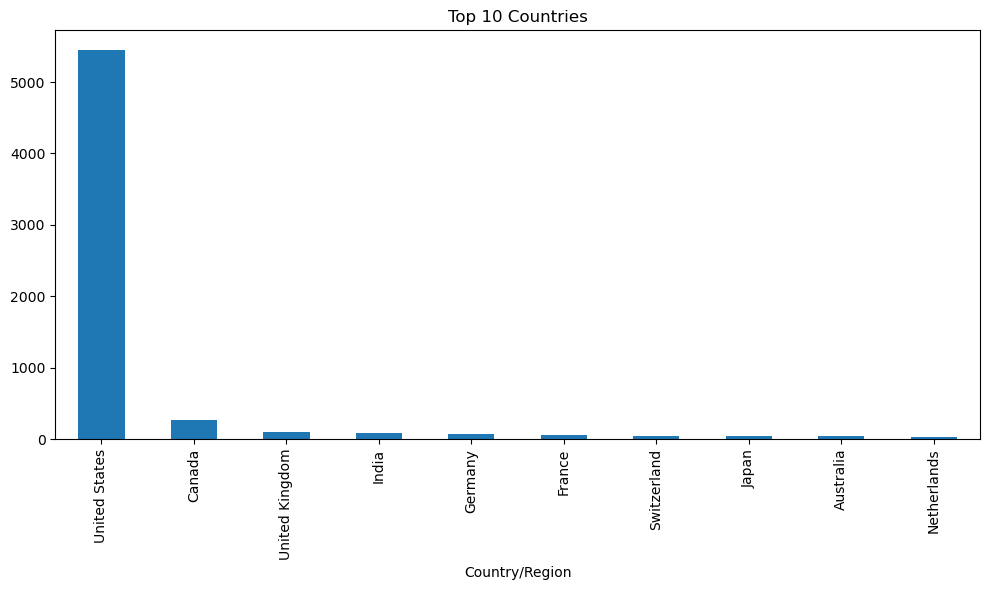

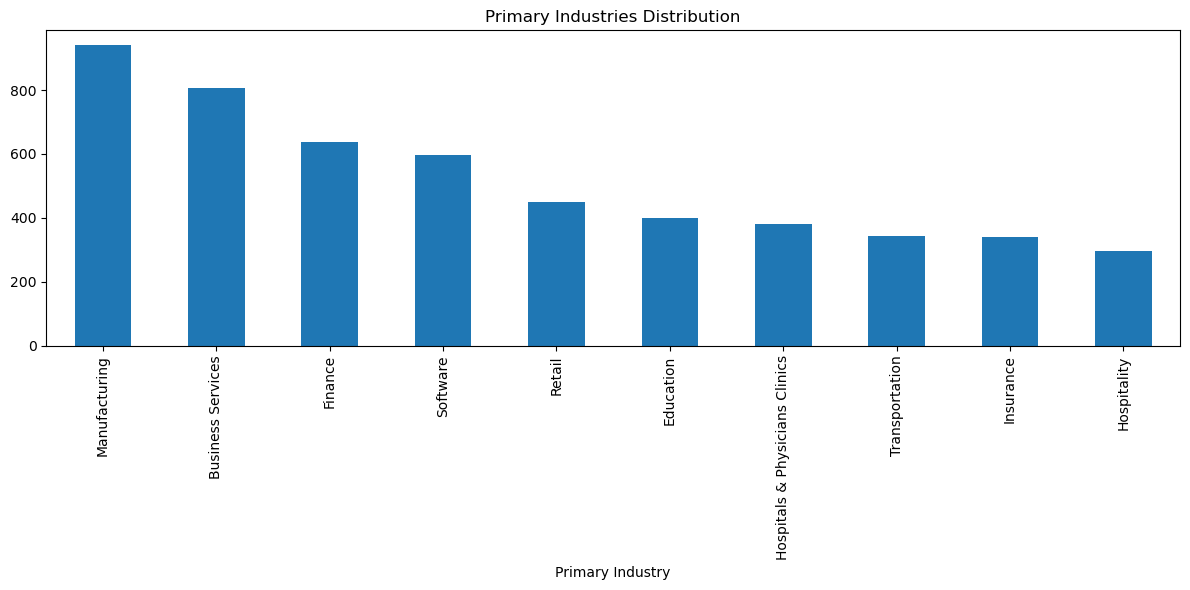

Shape after encoding: (6457, 441)


In [6]:
# For Web Technologies - this has a very high number of unique values (6257)
# It appears to be a semicolon-separated list of technologies used by each company
# You might want to extract this data into a more usable format

# Create dummy variables for the most common technologies
# First, create a list of all technologies by splitting the strings
all_technologies = []
for tech_list in df_selected['Web Technologies'].dropna():
    techs = [t.strip() for t in tech_list.split(';')]
    all_technologies.extend(techs)

# Get the top N most common technologies
from collections import Counter
top_techs = Counter(all_technologies).most_common(20)
print("Top 20 technologies:")
for tech, count in top_techs:
    print(f"{tech}: {count}")

# Create dummy variables for the top technologies
for tech, _ in top_techs:
    df_selected[f'Has_{tech.replace(" ", "_")}'] = df_selected['Web Technologies'].apply(
        lambda x: 1 if pd.notna(x) and tech in x else 0
    )

# For Time Zone, Country/Region, Primary Industry, Consolidated Industry and Industry
# These are more traditional categorical variables that could be encoded

# For visualization of distributions
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 countries visualization
plt.figure(figsize=(10, 6))
df_selected['Country/Region'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Countries')
plt.tight_layout()
plt.show()

# Top industries visualization  
plt.figure(figsize=(12, 6))
df_selected['Primary Industry'].value_counts().head(10).plot(kind='bar')
plt.title('Primary Industries Distribution')
plt.tight_layout()
plt.show()

# You can also use one-hot encoding for modeling
categorical_columns = [
    'Time Zone', 
    'Primary Industry', 
    'Consolidated Industry', 
    'Country/Region', 
    'Industry'
]

# One-hot encode the categorical variables
df_encoded = pd.get_dummies(df_selected, columns=categorical_columns, drop_first=True)
print(f"Shape after encoding: {df_encoded.shape}")

In [7]:
# Define numerical columns
numerical_columns = [
    'Annual Revenue', 
    'Number of Form Submissions', 
    'Number of times contacted',
    'Number of Pageviews', 
    'Company_Age',  # Replace Year Founded with Company Age
    'Number of Employees', 
    'Number of Sessions'
]

# Replace StandardScaler with MinMaxScaler to scale features to 0-1 range
from sklearn.preprocessing import MinMaxScaler

# Create a copy to avoid warnings
df_scaled = df_encoded.copy()

# Apply MinMaxScaler to numerical columns only
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled[numerical_columns] = scaler.fit_transform(df_scaled[numerical_columns].fillna(0))

# For categorical columns (one-hot encoded), they're already in the 0-1 range
# But if you want to confirm all features are scaled 0-1, you can check:
print("Min and max values for numerical features after scaling:")
for col in numerical_columns:
    print(f"{col}: Min = {df_scaled[col].min():.4f}, Max = {df_scaled[col].max():.4f}")

# Print the shape to confirm nothing changed in terms of dimensions
print(f"Shape after scaling: {df_scaled.shape}")

Min and max values for numerical features after scaling:
Annual Revenue: Min = 0.0000, Max = 1.0000
Number of Form Submissions: Min = 0.0000, Max = 1.0000
Number of times contacted: Min = 0.0000, Max = 1.0000
Number of Pageviews: Min = 0.0000, Max = 1.0000
Company_Age: Min = 0.0000, Max = 1.0000
Number of Employees: Min = 0.0000, Max = 1.0000
Number of Sessions: Min = 0.0000, Max = 1.0000
Shape after scaling: (6457, 441)


In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns

# For reproducibility
np.random.seed(42)

# Create the feature set for clustering
# First, identify all columns we want to use

# Numerical columns that have been scaled
numerical_columns = [
    'Annual Revenue', 
    'Number of Form Submissions', 
    'Number of times contacted',
    'Number of Pageviews', 
    'Company_Age',
    'Number of Employees', 
    'Number of Sessions'
]

columns_to_keep = numerical_columns.copy()

# Add all the dummy columns created from one-hot encoding and technology flags
for col in df_scaled.columns:
    if col not in numerical_columns and col != 'Web Technologies' and not col.endswith('Cluster'):
        if (col.startswith('Time Zone_') or  
            col.startswith('Consolidated Industry_') or 
            col.startswith('Country/Region_') or 
            col.startswith('Industry_') or
            col.startswith('Has_')):
            columns_to_keep.append(col)

# Create the feature set for clustering
X_cluster = df_scaled[columns_to_keep]

print(f"Shape of data for clustering: {X_cluster.shape}")
print(f"First few columns: {X_cluster.columns[:10].tolist()}")

Shape of data for clustering: (6457, 415)
First few columns: ['Annual Revenue', 'Number of Form Submissions', 'Number of times contacted', 'Number of Pageviews', 'Company_Age', 'Number of Employees', 'Number of Sessions', 'Has_Google_Tag_Manager', 'Has_Salesforce', 'Has_Microsoft_Office_365']


Elbow and Silhouette For K-Means


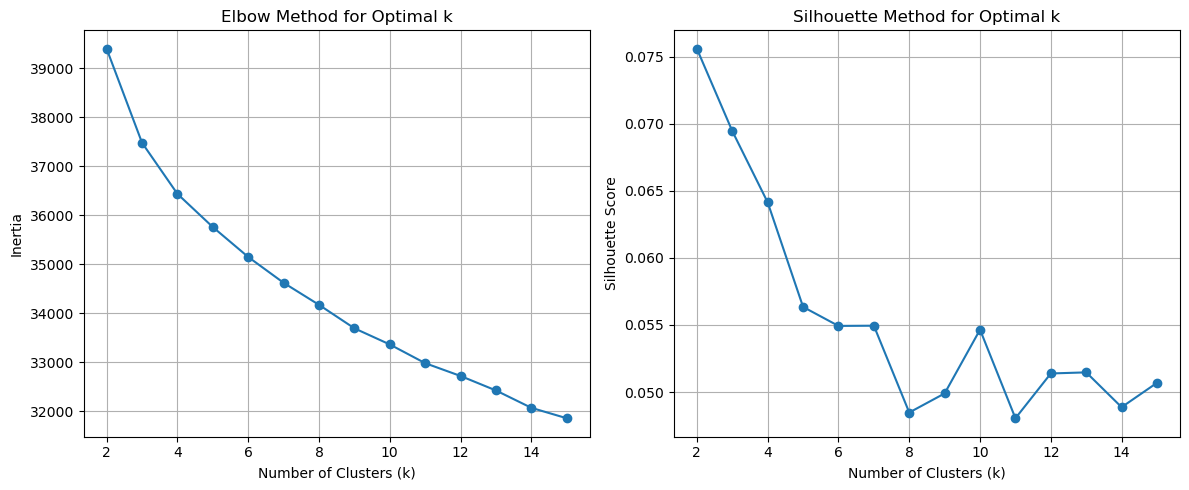

Elbow and Silhouette For Hierarchical


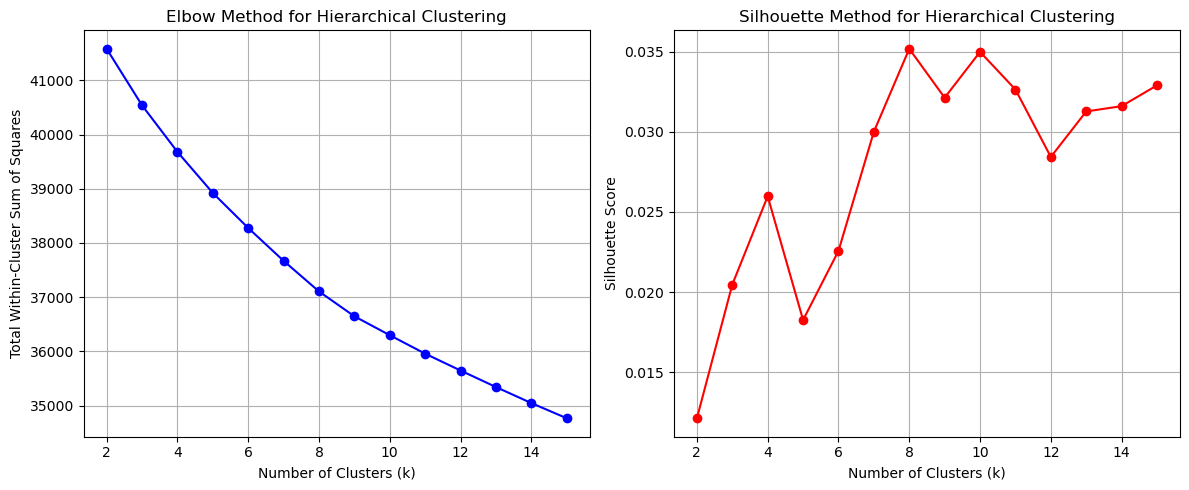

Elbow and Silhouette For DBSCAN


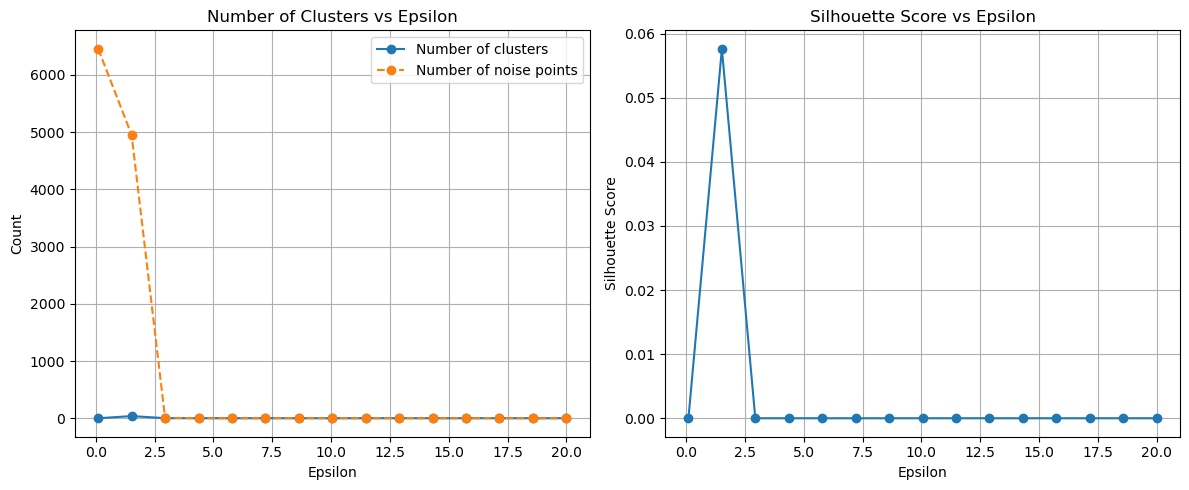

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors

# Function to find optimal K for K-means
def find_optimal_k(data, max_k=15):
    inertia = []
    silhouette_scores = []
    k_values = range(2, max_k + 1)
    
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        clusters = kmeans.fit_predict(data)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, clusters))
    
    # Plot elbow curve and silhouette scores
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    ax1.plot(k_values, inertia, 'o-')
    ax1.set_xlabel('Number of Clusters (k)')
    ax1.set_ylabel('Inertia')
    ax1.set_title('Elbow Method for Optimal k')
    ax1.grid(True)
    
    ax2.plot(k_values, silhouette_scores, 'o-')
    ax2.set_xlabel('Number of Clusters (k)')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title('Silhouette Method for Optimal k')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

# Function to find optimal clusters for Hierarchical Clustering
def find_optimal_hierarchical(data, max_k=15, linkage_type='ward'):
    # Store results
    total_within_variance = []
    silhouette_scores = []
    k_values = range(2, max_k + 1)
    
    # For each k, calculate silhouette score and total within-cluster variance
    for k in k_values:
        # Fit hierarchical clustering
        hierarchical = AgglomerativeClustering(n_clusters=k, linkage=linkage_type)
        labels = hierarchical.fit_predict(data)
        
        # Calculate silhouette score
        silhouette_scores.append(silhouette_score(data, labels))
        
        # Calculate total within-cluster variance (sum of squared distances to centroids)
        within_var = 0
        for cluster_id in range(k):
            # Get points in this cluster
            cluster_mask = labels == cluster_id
            cluster_points = data[cluster_mask]
            
            if len(cluster_points) > 0:
                # Calculate centroid
                centroid = np.mean(cluster_points, axis=0)
                
                # Calculate sum of squared distances to centroid
                squared_distances = np.sum((cluster_points - centroid)**2, axis=1)
                within_var += np.sum(squared_distances)
        
        total_within_variance.append(within_var)
    
    # Plot elbow curve and silhouette scores
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Elbow plot
    ax1.plot(k_values, total_within_variance, 'bo-')
    ax1.set_xlabel('Number of Clusters (k)')
    ax1.set_ylabel('Total Within-Cluster Sum of Squares')
    ax1.set_title('Elbow Method for Hierarchical Clustering')
    ax1.grid(True)
    
    # Silhouette plot
    ax2.plot(k_values, silhouette_scores, 'ro-')
    ax2.set_xlabel('Number of Clusters (k)')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title('Silhouette Method for Hierarchical Clustering')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()


# Function to find optimal parameters for DBSCAN
def find_optimal_dbscan(data, min_samples=5, max_eps=20, n_eps=15):
    # Generate range of epsilon values
    eps_values = np.linspace(0.1, max_eps, n_eps)
    
    # Store results
    n_clusters_list = []
    silhouette_scores = []
    n_noise_points = []
    
    # Evaluate different epsilon values
    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(data)
        
        # Count number of clusters (excluding noise points labeled as -1)
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        n_clusters_list.append(n_clusters)
        
        # Count noise points
        n_noise = list(clusters).count(-1)
        n_noise_points.append(n_noise)
        
        # Calculate silhouette score if we have at least 2 clusters
        if n_clusters >= 2:
            # Remove noise points for silhouette calculation
            valid_indices = clusters != -1
            if sum(valid_indices) > 1:  # Need at least 2 valid points
                score = silhouette_score(data[valid_indices], clusters[valid_indices])
                silhouette_scores.append(score)
            else:
                silhouette_scores.append(0)  # No valid clusters
        else:
            silhouette_scores.append(0)  # Less than 2 clusters
    
    # Plot results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot number of clusters vs epsilon (similar to elbow curve)
    ax1.plot(eps_values, n_clusters_list, 'o-', label='Number of clusters')
    ax1.plot(eps_values, n_noise_points, 'o--', label='Number of noise points')
    ax1.set_xlabel('Epsilon')
    ax1.set_ylabel('Count')
    ax1.set_title('Number of Clusters vs Epsilon')
    ax1.grid(True)
    ax1.legend()
    
    # Plot silhouette scores
    ax2.plot(eps_values, silhouette_scores, 'o-')
    ax2.set_xlabel('Epsilon')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title('Silhouette Score vs Epsilon')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

# Run the analysis
print("Elbow and Silhouette For K-Means")
optimal_k = find_optimal_k(X_cluster)
print("Elbow and Silhouette For Hierarchical")
find_optimal_hierarchical(X_cluster)
print("Elbow and Silhouette For DBSCAN")
find_optimal_dbscan(X_cluster)


=== K-Means Clustering ===


/Users/marymorkos/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


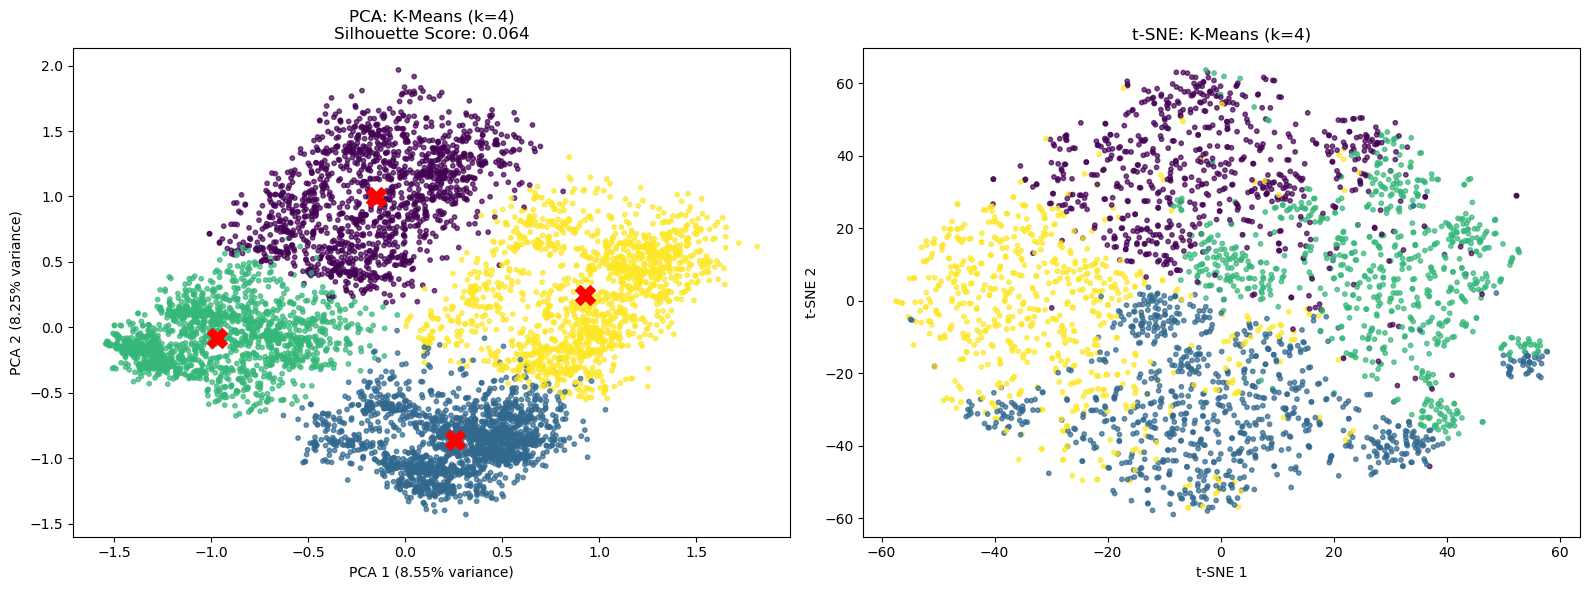

Cluster distribution:
0    1421
1    1902
2    1671
3    1463
Name: count, dtype: int64

=== Hierarchical Clustering ===


/Users/marymorkos/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


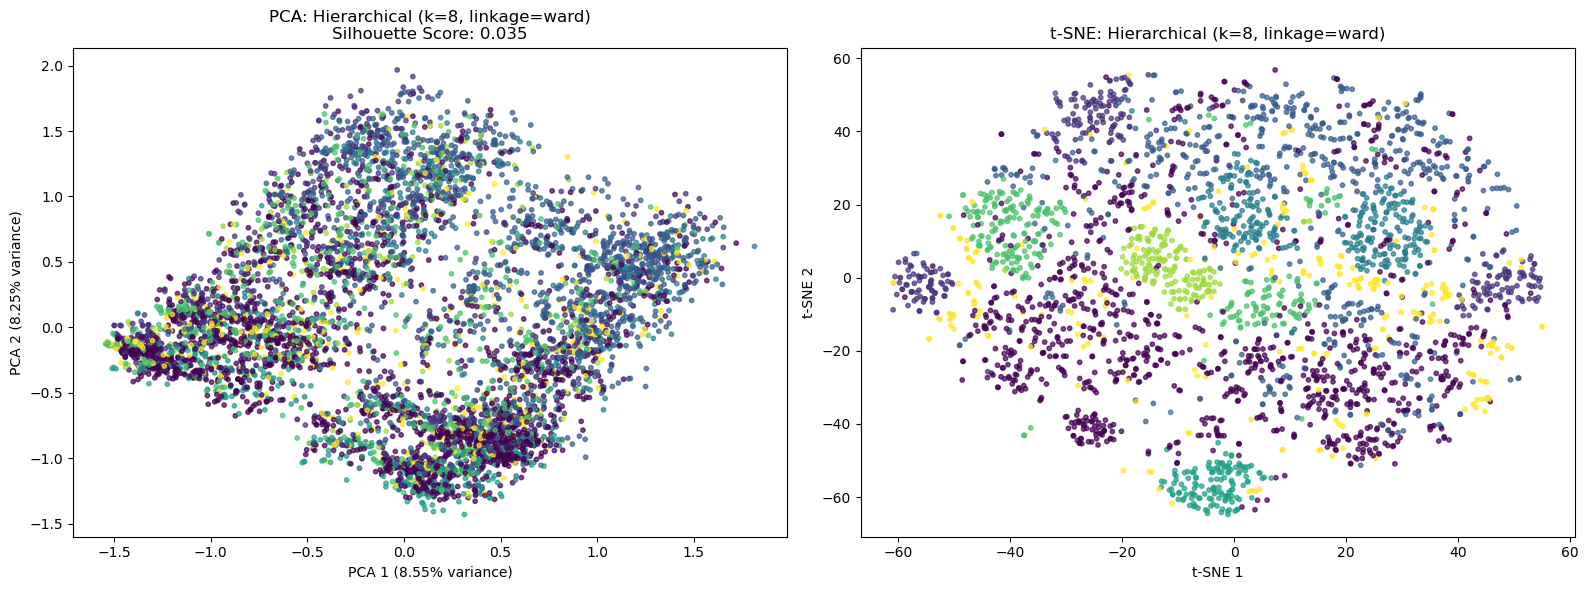

Cluster distribution:
0    2251
1     579
2    1280
3     691
4     297
5     528
6     305
7     526
Name: count, dtype: int64

=== DBSCAN Clustering ===


/Users/marymorkos/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


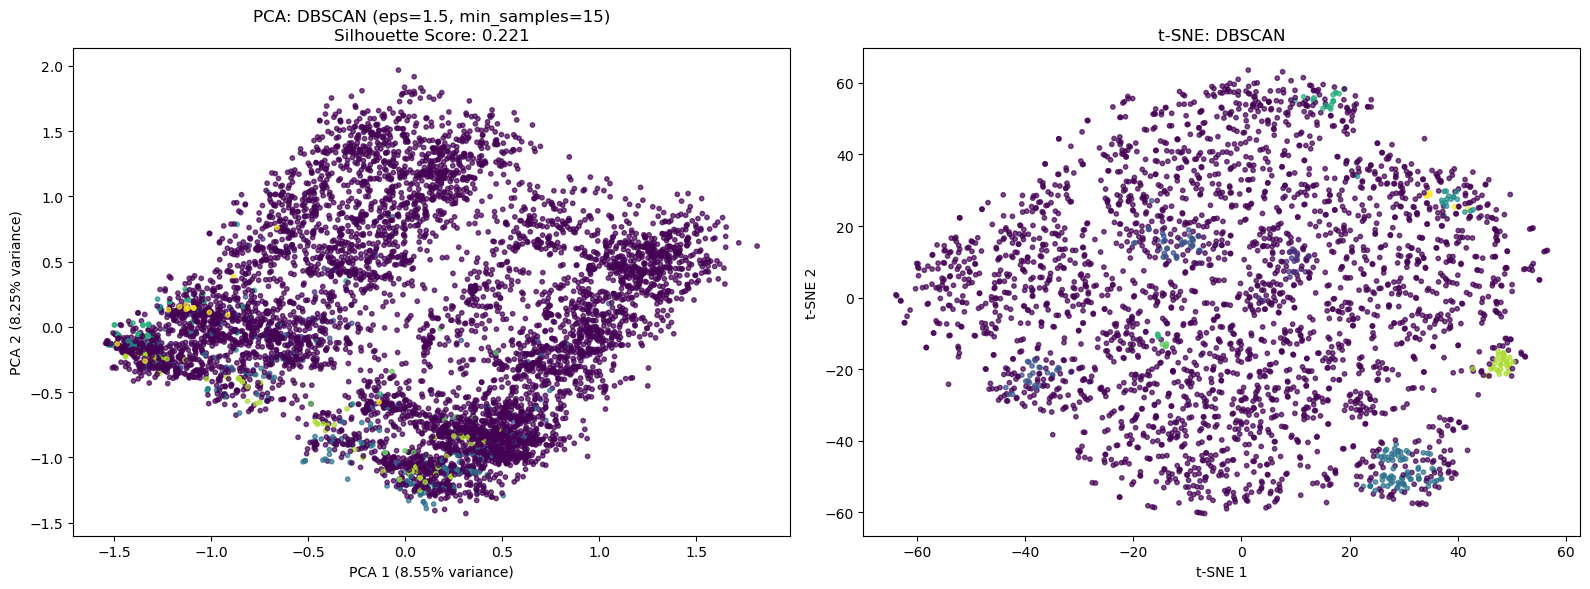

Cluster distribution:
-1    5933
 0      54
 1     146
 2     151
 3      43
 4      38
 5      14
 6      64
 7      14
Name: count, dtype: int64
Noise points: 5933 (91.9%)

=== Clustering Model Comparison ===
K-Means Silhouette Score: 0.064
Hierarchical Silhouette Score: 0.035
DBSCAN Silhouette Score: 0.221


In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

# For reproducibility
np.random.seed(42)

# 1. K-Means Clustering with improved visualization
def kmeans_clustering(data, n_clusters=5):
    # Train the model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(data)
    
    # Get silhouette score
    silhouette = silhouette_score(data, clusters) if len(set(clusters)) > 1 else 0
    
    # Add cluster labels to the original dataset
    result_df = df_scaled.copy()
    result_df['KMeans_Cluster'] = clusters
    
    # Get cluster centers for interpretation
    centers = pd.DataFrame(kmeans.cluster_centers_, columns=data.columns)
    
    # Create a figure with 2 visualization methods side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Visualization 1: PCA
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data)
    
    ax1.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7, s=10)
    ax1.scatter(pca.transform(centers)[:, 0], pca.transform(centers)[:, 1], 
                marker='X', s=200, c='red')
    ax1.set_title(f'PCA: K-Means (k={n_clusters})\nSilhouette Score: {silhouette:.3f}')
    ax1.set_xlabel(f'PCA 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
    ax1.set_ylabel(f'PCA 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
    
    # Visualization 2: t-SNE
    # Sample if dataset is large (t-SNE is computationally expensive)
    sample_size = min(3000, len(data))
    if len(data) > sample_size:
        indices = np.random.choice(len(data), sample_size, replace=False)
        data_sample = data.iloc[indices]
        clusters_sample = clusters[indices]
    else:
        data_sample = data
        clusters_sample = clusters
    
    # Compute t-SNE
    tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
    data_tsne = tsne.fit_transform(data_sample)
    
    ax2.scatter(data_tsne[:, 0], data_tsne[:, 1], c=clusters_sample, cmap='viridis', alpha=0.7, s=10)
    ax2.set_title(f't-SNE: K-Means (k={n_clusters})')
    ax2.set_xlabel('t-SNE 1')
    ax2.set_ylabel('t-SNE 2')
    
    plt.tight_layout()
    plt.show()
    
    # Get cluster distribution
    print("Cluster distribution:")
    print(pd.Series(clusters).value_counts().sort_index())
    
    return result_df, silhouette, kmeans

# 2. Hierarchical Clustering with improved visualization
def hierarchical_clustering(data, n_clusters=5, linkage='ward'):
    # Train the model
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    clusters = hierarchical.fit_predict(data)
    
    # Get silhouette score
    silhouette = silhouette_score(data, clusters) if len(set(clusters)) > 1 else 0
    
    # Add cluster labels to the original dataset
    result_df = df_scaled.copy()
    result_df['Hierarchical_Cluster'] = clusters
    
    # Create a figure with 2 visualization methods side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Visualization 1: PCA
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data)
    
    ax1.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7, s=10)
    ax1.set_title(f'PCA: Hierarchical (k={n_clusters}, linkage={linkage})\nSilhouette Score: {silhouette:.3f}')
    ax1.set_xlabel(f'PCA 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
    ax1.set_ylabel(f'PCA 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
    
    # Visualization 2: t-SNE
    # Sample if dataset is large
    sample_size = min(3000, len(data))
    if len(data) > sample_size:
        indices = np.random.choice(len(data), sample_size, replace=False)
        data_sample = data.iloc[indices]
        clusters_sample = clusters[indices]
    else:
        data_sample = data
        clusters_sample = clusters
    
    # Compute t-SNE
    tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
    data_tsne = tsne.fit_transform(data_sample)
    
    ax2.scatter(data_tsne[:, 0], data_tsne[:, 1], c=clusters_sample, cmap='viridis', alpha=0.7, s=10)
    ax2.set_title(f't-SNE: Hierarchical (k={n_clusters}, linkage={linkage})')
    ax2.set_xlabel('t-SNE 1')
    ax2.set_ylabel('t-SNE 2')
    
    plt.tight_layout()
    plt.show()
    
    # Get cluster distribution
    print("Cluster distribution:")
    print(pd.Series(clusters).value_counts().sort_index())
    
    return result_df, silhouette, hierarchical

# 3. DBSCAN Clustering with improved visualization
def dbscan_clustering(data, eps=0.5, min_samples=5):
    # Train the model
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(data)
    
    # Get silhouette score (if more than one cluster and no noise points labeled as -1)
    non_noise_mask = clusters != -1
    if non_noise_mask.sum() > 1 and len(set(clusters[non_noise_mask])) > 1:
        silhouette = silhouette_score(data[non_noise_mask], clusters[non_noise_mask])
    else:
        silhouette = 0
    
    # Add cluster labels to the original dataset
    result_df = df_scaled.copy()
    result_df['DBSCAN_Cluster'] = clusters
    
    # Create a figure with 2 visualization methods side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Visualization 1: PCA
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data)
    
    ax1.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7, s=10)
    ax1.set_title(f'PCA: DBSCAN (eps={eps}, min_samples={min_samples})\nSilhouette Score: {silhouette:.3f}')
    ax1.set_xlabel(f'PCA 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
    ax1.set_ylabel(f'PCA 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
    
    # Visualization 2: t-SNE
    # Sample if dataset is large
    sample_size = min(3000, len(data))
    if len(data) > sample_size:
        indices = np.random.choice(len(data), sample_size, replace=False)
        data_sample = data.iloc[indices]
        clusters_sample = clusters[indices]
    else:
        data_sample = data
        clusters_sample = clusters
    
    # Compute t-SNE
    tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
    data_tsne = tsne.fit_transform(data_sample)
    
    ax2.scatter(data_tsne[:, 0], data_tsne[:, 1], c=clusters_sample, cmap='viridis', alpha=0.7, s=10)
    ax2.set_title(f't-SNE: DBSCAN')
    ax2.set_xlabel('t-SNE 1')
    ax2.set_ylabel('t-SNE 2')
    
    plt.tight_layout()
    plt.show()
    
    # Get cluster distribution and percentage of noise
    print("Cluster distribution:")
    counts = pd.Series(clusters).value_counts().sort_index()
    print(counts)
    if -1 in counts:
        print(f"Noise points: {counts[-1]} ({counts[-1]/len(clusters)*100:.1f}%)")
    
    return result_df, silhouette, dbscan

# Function to compare the clustering algorithms
def compare_clustering_results(kmeans_results, hierarchical_results, dbscan_results):
    # Print silhouette scores
    print("\n=== Clustering Model Comparison ===")
    print(f"K-Means Silhouette Score: {kmeans_results[1]:.3f}")
    print(f"Hierarchical Silhouette Score: {hierarchical_results[1]:.3f}")
    print(f"DBSCAN Silhouette Score: {dbscan_results[1]:.3f}")

# Run each clustering algorithm with the new visualization techniques
print("\n=== K-Means Clustering ===")
kmeans_results = kmeans_clustering(X_cluster, n_clusters=4)  

print("\n=== Hierarchical Clustering ===")
hierarchical_results = hierarchical_clustering(X_cluster, n_clusters=8, linkage='ward') 

print("\n=== DBSCAN Clustering ===")
dbscan_results = dbscan_clustering(X_cluster, eps=1.5, min_samples=15)  

# Compare the results
best_algorithm = compare_clustering_results(kmeans_results, hierarchical_results, dbscan_results)

In [11]:
# Analyze the best model (K-means)
best_model_df = kmeans_results[0]  # First element is the dataframe with cluster assignments
best_model_silhouette = kmeans_results[1]  # Second element is the silhouette score
best_model_algorithm = kmeans_results[2]  # Third element is the model itself

In [12]:
df_selected.columns.tolist()

['Annual Revenue',
 'Number of Form Submissions',
 'Web Technologies',
 'Number of times contacted',
 'Time Zone',
 'Primary Industry',
 'Number of Pageviews',
 'Year Founded',
 'Consolidated Industry',
 'Number of Employees',
 'Number of Sessions',
 'Country/Region',
 'Industry',
 'Company_Age',
 'Has_Google_Tag_Manager',
 'Has_Salesforce',
 'Has_Microsoft_Office_365',
 'Has_Google_Analytics',
 'Has_Microsoft_Exchange_Online',
 'Has_Outlook',
 'Has_App_Nexus',
 'Has_Facebook_Advertiser',
 'Has_Wordpress',
 'Has_MediaMath',
 'Has_Cloud_Flare',
 'Has_Recaptcha',
 'Has_Youtube',
 'Has_Dstillery',
 'Has_Google_Maps',
 'Has_Stripe',
 'Has_Nginx',
 'Has_Bing_Advertiser',
 'Has_Vimeo',
 'Has_Route_53']


=== CLUSTER ANALYSES ===

1. Key Feature Boxplots


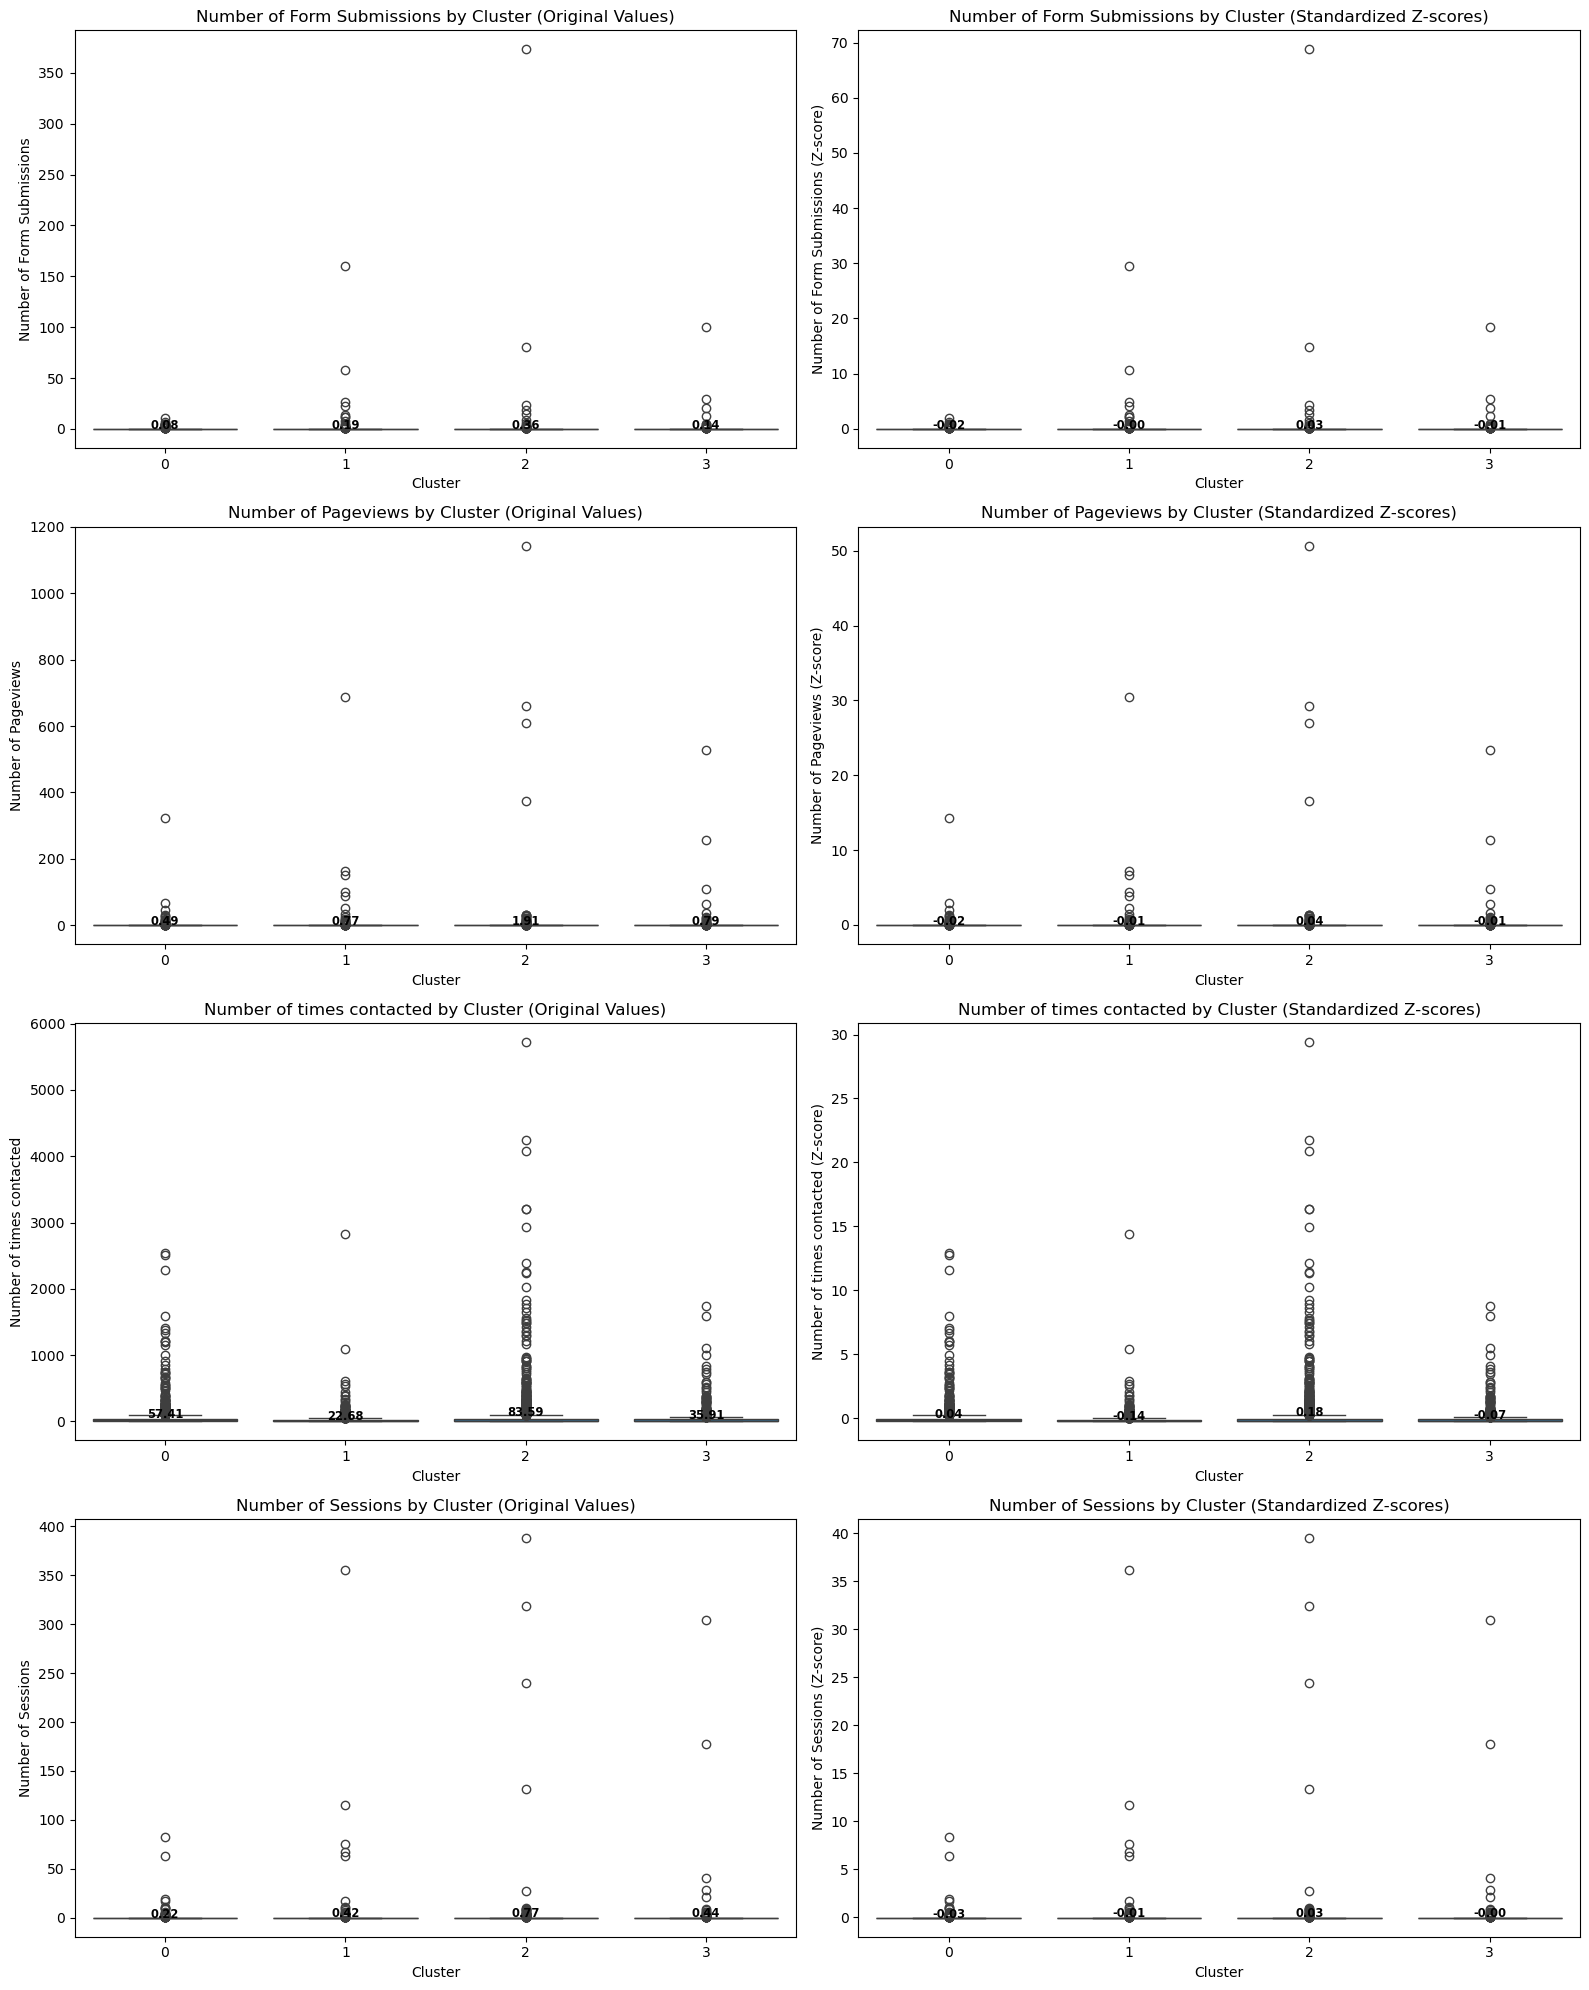

Summary of key differentiating features:
                            Cluster 0 Mean  Cluster 0 % Diff  Cluster 1 Mean  \
Number of Form Submissions            0.08            -62.43            0.19   
Number of Pageviews                   0.49            -51.21            0.77   
Number of times contacted            57.41             16.96           22.68   
Number of Sessions                    0.22            -53.66            0.42   

                            Cluster 1 % Diff  Cluster 2 Mean  \
Number of Form Submissions             -2.93            0.36   
Number of Pageviews                   -23.45            1.91   
Number of times contacted             -53.79           83.59   
Number of Sessions                    -10.44            0.77   

                            Cluster 2 % Diff  Cluster 3 Mean  Cluster 3 % Diff  
Number of Form Submissions             81.86            0.14            -29.06  
Number of Pageviews                    89.12            0.79            -21

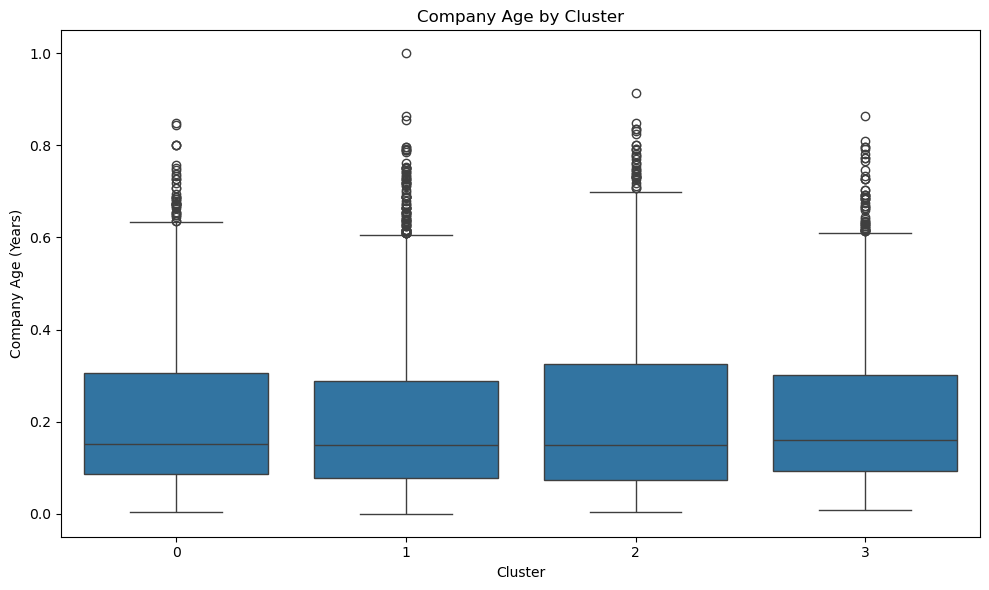


3. Technology Differentiation Analysis


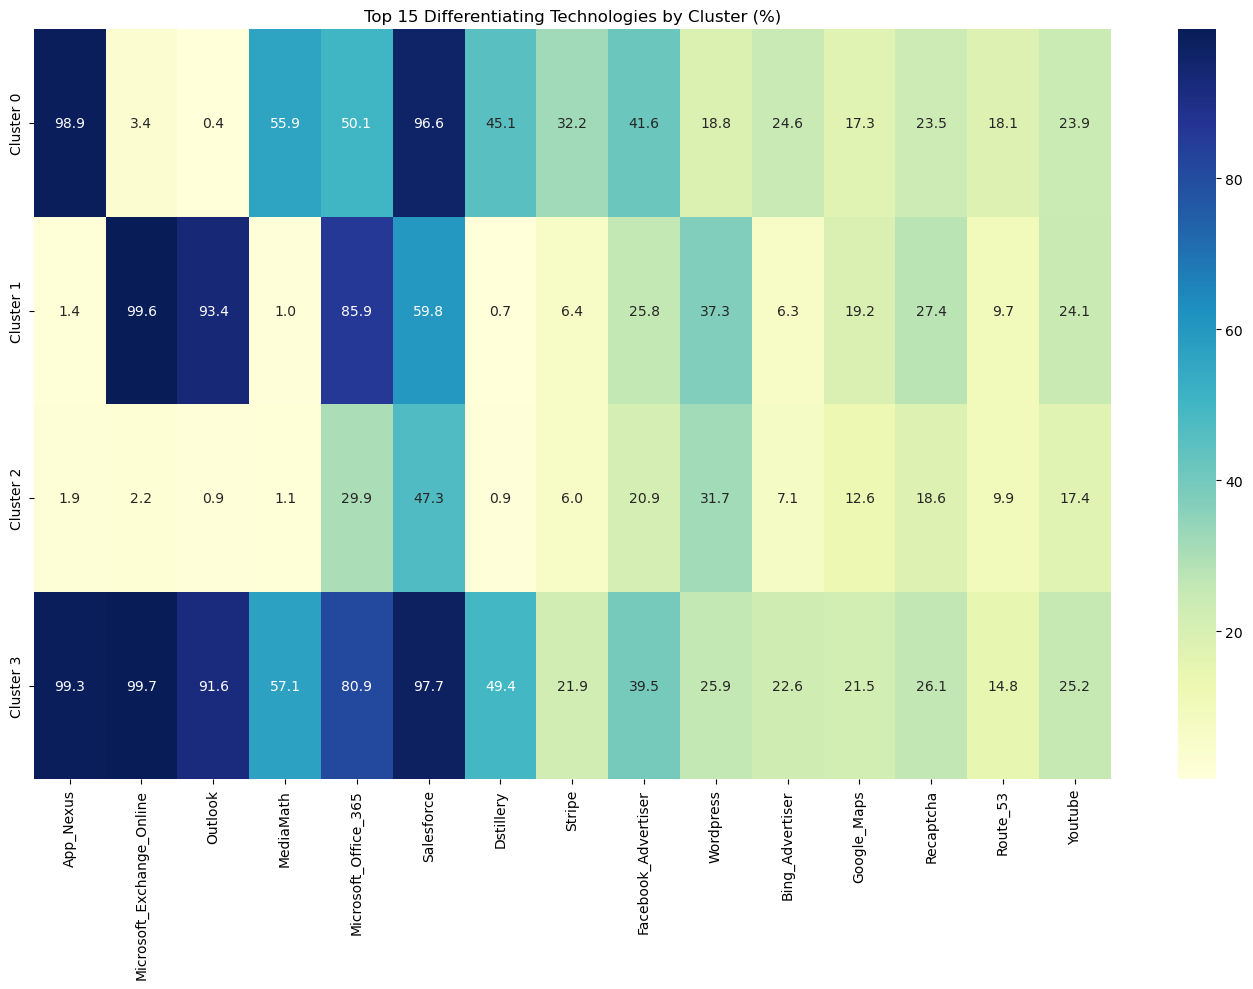


Technologies where clusters exceed the average:
  Cluster 0 Higher Diff 0           Cluster 1 Higher Diff 1  \
0        App_Nexus  64.7%  Microsoft_Exchange_Online  89.2%   
1        MediaMath  36.1%                    Outlook  85.6%   
2       Salesforce  28.3%       Microsoft_Office_365  49.5%   
3        Dstillery  28.1%                  Wordpress  21.5%   
4           Stripe  20.7%         Google_Tag_Manager  19.4%   

     Cluster 2 Higher Diff 2           Cluster 3 Higher Diff 3  
0    Google_Analytics  24.3%                  App_Nexus  88.7%  
1  Google_Tag_Manager  24.2%  Microsoft_Exchange_Online  85.2%  
2           Wordpress  13.5%                    Outlook  78.7%  
3         Cloud_Flare  10.7%                 Salesforce  61.6%  
4               Nginx   2.7%                  MediaMath  51.1%  

Technologies where clusters lag behind the average:
             Cluster 0 Lower Diff 0 (-)  Cluster 1 Lower Diff 1 (-)  \
0  Microsoft_Exchange_Online     -63.8%        App_Nexus  

In [13]:
# Final enhanced cluster analysis code (restores all previous insights + adds Company_Age)

def feature_boxplots(best_model_df, cluster_col, numerical_columns, df_cleaned):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    import pandas as pd
    from sklearn.preprocessing import StandardScaler

    plot_data = pd.DataFrame()
    plot_data['Cluster'] = best_model_df[cluster_col]

    feature_variation = {}
    for col in numerical_columns:
        if col in df_cleaned.columns:
            cluster_means = []
            for cluster in sorted(best_model_df[cluster_col].unique()):
                cluster_data = best_model_df[best_model_df[cluster_col] == cluster]
                cluster_means.append(df_cleaned.loc[cluster_data.index, col].mean())
            if np.mean(cluster_means) != 0:
                feature_variation[col] = np.std(cluster_means) / np.mean(cluster_means)
            else:
                feature_variation[col] = 0

    top_features = sorted(feature_variation.items(), key=lambda x: x[1], reverse=True)[:4]
    top_feature_names = [feature[0] for feature in top_features]

    scaler = StandardScaler()

    for feature in top_feature_names:
        plot_data[feature] = df_cleaned[feature].values
        standardized_values = scaler.fit_transform(df_cleaned[feature].values.reshape(-1, 1)).flatten()
        plot_data[f"{feature}_std"] = standardized_values

    fig, axes = plt.subplots(4, 2, figsize=(16, 20))
    for i, feature in enumerate(top_feature_names):
        ax1 = axes[i, 0]
        sns.boxplot(x='Cluster', y=feature, data=plot_data, ax=ax1)
        ax1.set_title(f'{feature} by Cluster (Original Values)')
        for cluster in sorted(plot_data['Cluster'].unique()):
            mean_val = plot_data[plot_data['Cluster'] == cluster][feature].mean()
            ax1.text(cluster, mean_val, f'{mean_val:.2f}', ha='center', size='small', weight='semibold')

        ax2 = axes[i, 1]
        sns.boxplot(x='Cluster', y=f"{feature}_std", data=plot_data, ax=ax2)
        ax2.set_title(f'{feature} by Cluster (Standardized Z-scores)')
        ax2.set_ylabel(f'{feature} (Z-score)')
        for cluster in sorted(plot_data['Cluster'].unique()):
            mean_val = plot_data[plot_data['Cluster'] == cluster][f"{feature}_std"].mean()
            ax2.text(cluster, mean_val, f'{mean_val:.2f}', ha='center', size='small', weight='semibold')

    plt.tight_layout()
    plt.show()

    summary_table = {}
    for feature in top_feature_names:
        summary_table[feature] = {}
        for cluster in sorted(plot_data['Cluster'].unique()):
            cluster_mean = plot_data[plot_data['Cluster'] == cluster][feature].mean()
            overall_mean = plot_data[feature].mean()
            pct_diff = ((cluster_mean - overall_mean) / overall_mean) * 100 if overall_mean != 0 else 0
            summary_table[feature][f'Cluster {cluster} Mean'] = cluster_mean
            summary_table[feature][f'Cluster {cluster} % Diff'] = pct_diff

    summary_df = pd.DataFrame(summary_table).T
    print("Summary of key differentiating features:")
    print(summary_df.round(2))
    return top_feature_names, summary_df


def plot_company_age_distribution(df, cluster_col='KMeans_Cluster'):
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=cluster_col, y='Company_Age', data=df)
    plt.title("Company Age by Cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Company Age (Years)")
    plt.tight_layout()
    plt.show()


def technology_heatmap(best_model_df, cluster_col, df_cleaned=None):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    import pandas as pd

    tech_columns = [col for col in best_model_df.columns if col.startswith('Has_')]
    if not tech_columns:
        print("No technology columns found starting with 'Has_'")
        return None

    tech_usage = pd.DataFrame()
    for cluster in sorted(best_model_df[cluster_col].unique()):
        cluster_data = best_model_df[best_model_df[cluster_col] == cluster]
        tech_percentages = {}
        for tech in tech_columns:
            tech_name = tech.replace('Has_', '')
            percentage = cluster_data[tech].mean() * 100
            tech_percentages[tech_name] = percentage
        tech_usage[f'Cluster {cluster}'] = pd.Series(tech_percentages)

    tech_usage['Std_Dev'] = tech_usage.std(axis=1)
    tech_usage = tech_usage.sort_values('Std_Dev', ascending=False)
    top_n = min(15, len(tech_usage))
    display_data = tech_usage.head(top_n).drop('Std_Dev', axis=1)
    display_data['Range'] = display_data.max(axis=1) - display_data.min(axis=1)
    display_data = display_data.sort_values('Range', ascending=False).drop('Range', axis=1)

    plt.figure(figsize=(14, 10))
    ax = sns.heatmap(display_data.T, annot=True, fmt='.1f', cmap='YlGnBu')
    ax.set_title(f'Top {top_n} Differentiating Technologies by Cluster (%)')
    plt.tight_layout()
    plt.show()

    cluster_higher = {}
    cluster_lower = {}

    for cluster in sorted(best_model_df[cluster_col].unique()):
        cluster_col_name = f'Cluster {cluster}'
        other_clusters = [col for col in tech_usage.columns if col != cluster_col_name and col != 'Std_Dev']
        tech_usage[f'Diff_{cluster}'] = tech_usage.apply(
            lambda row: row[cluster_col_name] - row[other_clusters].mean(), axis=1)

        cluster_higher[f'Cluster {cluster} Higher'] = []
        cluster_higher[f'Diff {cluster}'] = []
        top_distinctive = tech_usage.sort_values(f'Diff_{cluster}', ascending=False).head(5)
        for tech, diff in zip(top_distinctive.index, top_distinctive[f'Diff_{cluster}']):
            cluster_higher[f'Cluster {cluster} Higher'].append(tech)
            cluster_higher[f'Diff {cluster}'].append(f"{diff:.1f}%")

        cluster_lower[f'Cluster {cluster} Lower'] = []
        cluster_lower[f'Diff {cluster} (-)'] = []
        bottom_distinctive = tech_usage.sort_values(f'Diff_{cluster}', ascending=True).head(5)
        for tech, diff in zip(bottom_distinctive.index, bottom_distinctive[f'Diff_{cluster}']):
            cluster_lower[f'Cluster {cluster} Lower'].append(tech)
            cluster_lower[f'Diff {cluster} (-)'].append(f"{diff:.1f}%")

    print("\nTechnologies where clusters exceed the average:")
    print(pd.DataFrame(cluster_higher))

    print("\nTechnologies where clusters lag behind the average:")
    print(pd.DataFrame(cluster_lower))


def cluster_summary(best_model_df, cluster_col, numerical_columns, df_cleaned):
    import pandas as pd
    import numpy as np

    if 'Company_Age' in df_cleaned.columns:
        df_cleaned['Company_Age_Group'] = pd.cut(
            df_cleaned['Company_Age'],
            bins=[0, 5, 10, 20, 100],
            labels=['0-5 yrs', '6-10 yrs', '11-20 yrs', '20+ yrs']
        )

    summary = {}
    num_summary = pd.DataFrame()

    for cluster in sorted(best_model_df[cluster_col].unique()):
        cluster_data = best_model_df[best_model_df[cluster_col] == cluster]

        if 'Cluster Size' not in summary:
            summary['Cluster Size'] = {}
            summary['Percentage'] = {}

        summary['Cluster Size'][f'Cluster {cluster}'] = len(cluster_data)
        summary['Percentage'][f'Cluster {cluster}'] = f"{len(cluster_data)/len(best_model_df)*100:.1f}%"

        for col in numerical_columns:
            if col in df_cleaned.columns:
                cluster_mean = df_cleaned.loc[cluster_data.index, col].mean()
                overall_mean = df_cleaned[col].mean()
                if overall_mean != 0:
                    pct_diff = (cluster_mean - overall_mean) / overall_mean * 100
                    num_summary.loc[col, f'Cluster {cluster} Mean'] = cluster_mean
                    num_summary.loc[col, f'Cluster {cluster} % Diff'] = pct_diff

    summary_df = pd.DataFrame(summary)

    key_differentiators = {}
    for cluster in sorted(best_model_df[cluster_col].unique()):
        diff_col = f'Cluster {cluster} % Diff'
        if diff_col in num_summary.columns:
            sorted_diffs = num_summary[diff_col].abs().sort_values(ascending=False)
            for feature in sorted_diffs.index[:3]:
                diff_value = num_summary.loc[feature, diff_col]
                direction = "higher" if diff_value > 0 else "lower"
                key_differentiators[f'Cluster {cluster} - {feature}'] = f"{abs(diff_value):.1f}% {direction}"

    cat_columns = ['Industry', 'Country/Region', 'Time Zone', 'Consolidated Industry', 'Company_Age_Group']
    cat_summary = {}

    for cat_col in cat_columns:
        if cat_col in df_cleaned.columns:
            overall_dist = df_cleaned[cat_col].value_counts(normalize=True).head(3)
            for cluster in sorted(best_model_df[cluster_col].unique()):
                cluster_data = df_cleaned[df_cleaned.index.isin(
                    best_model_df[best_model_df[cluster_col] == cluster].index)]
                cluster_dist = cluster_data[cat_col].value_counts(normalize=True).head(3)
                for category, pct in cluster_dist.items():
                    cat_key = f'{cat_col} - {category}'
                    if cat_key not in cat_summary:
                        cat_summary[cat_key] = {}
                    cat_summary[cat_key][f'Cluster {cluster}'] = f"{pct*100:.1f}%"
                    if category in overall_dist:
                        overall_pct = overall_dist[category]
                        pct_diff = (pct - overall_pct) / overall_pct * 100 if overall_pct > 0 else 0
                        if abs(pct_diff) > 10:
                            direction = "higher" if pct_diff > 0 else "lower"
                            diff_key = f'{cat_col} - {category} vs Avg'
                            if diff_key not in cat_summary:
                                cat_summary[diff_key] = {}
                            cat_summary[diff_key][f'Cluster {cluster}'] = f"{abs(pct_diff):.1f}% {direction}"

    cat_df = pd.DataFrame(cat_summary).T

    for cluster in sorted(best_model_df[cluster_col].unique()):
        print(f"=== CLUSTER {cluster} SUMMARY ===")
        print(f"Size: {summary['Cluster Size'][f'Cluster {cluster}']} companies ({summary['Percentage'][f'Cluster {cluster}']})")
        print("Key Differentiators:")
        for key, value in key_differentiators.items():
            if key.startswith(f'Cluster {cluster}'):
                feature = key.split(' - ')[1]
                print(f"- {feature}: {value} than average")
        print("Category Concentration:")
        for key in cat_summary:
            if not key.endswith('vs Avg') and f'Cluster {cluster}' in cat_summary[key]:
                category = key.split(' - ')[1]
                percentage = cat_summary[key][f'Cluster {cluster}']
                diff_key = f"{key} vs Avg"
                diff_text = ""
                if diff_key in cat_summary and f'Cluster {cluster}' in cat_summary[diff_key]:
                    diff_text = f" ({cat_summary[diff_key][f'Cluster {cluster}']})"
                print(f"- {category}: {percentage}{diff_text}")

    return summary_df, num_summary, pd.DataFrame(cat_summary).T

def run_cluster_analyses(best_model_df, cluster_col, numerical_columns, df_cleaned):
    print("\n=== CLUSTER ANALYSES ===")

    print("\n1. Key Feature Boxplots")
    top_features, summary_table = feature_boxplots(best_model_df, cluster_col, numerical_columns, df_cleaned)

    print("\n2. Company Age by Cluster")
    if 'Company_Age' in df_cleaned.columns:
        plot_company_age_distribution(best_model_df)

    print("\n3. Technology Differentiation Analysis")
    technology_heatmap(best_model_df, cluster_col, df_cleaned)

    print("\n4. Cluster Summary")
    from copy import deepcopy
    summary_func = deepcopy(cluster_summary)
    summary, num_summary, cat_summary = summary_func(best_model_df, cluster_col, numerical_columns, df_cleaned)

    return top_features, summary_table, summary


# Example call:
top_features, summary_table, summary = run_cluster_analyses(
    best_model_df,               
    'KMeans_Cluster',           
    numerical_columns, 
    df_selected                 
)



In [30]:
# 🧠 Simplified Customer Segmentation Model (7 Numeric Features from Clean GitHub Data)

import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import joblib

# 🔹 STEP 1: Load your cleaned dataset (replace with your GitHub or local CSV as needed)
# Example: df = pd.read_csv("https://raw.githubusercontent.com/your/path/to/final_merged_dataset.csv")
# df = pd.read_csv("path_to_your_data.csv")

# 🔹 STEP 2: Ensure 'Year Founded' is not null and compute 'Company_Age'
df = df[df['Year Founded'].notnull()].copy()
current_year = datetime.datetime.now().year
df['Company_Age'] = current_year - df['Year Founded']

# 🔹 STEP 3: Define 7 key numeric features for segmentation
selected_features = [
    'Annual Revenue',
    'Number of Form Submissions',
    'Number of times contacted',
    'Number of Pageviews',
    'Company_Age',
    'Number of Employees',
    'Number of Sessions'
]

# 🔹 STEP 4: Prepare feature matrix (remove rows with any missing values)
X = df[selected_features].dropna()

# 🔹 STEP 5: Scale features with MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 🔹 STEP 6: Train a simplified 5-cluster KMeans model
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# 🔹 STEP 7: Save model and scaler with descriptive filenames
joblib.dump(kmeans, 'kmeans_model_simplified_7features.pkl')
joblib.dump(scaler, 'minmax_scaler_simplified_7features.pkl')

print('✅ Models saved as:')
print('   • kmeans_model_simplified_7features.pkl')
print('   • minmax_scaler_simplified_7features.pkl')


✅ Models saved as:
   • kmeans_model_simplified_7features.pkl
   • minmax_scaler_simplified_7features.pkl
